In [1]:
# import nltk
# nltk.download('punkt')

In [2]:
def keys(ticker):
    import requests
    from gensim.summarization import keywords
    import nltk
    from nltk.tokenize import sent_tokenize
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    import yake
    import pandas as pd
    
    
    fm_key = '8a1cf9d14d53126b05c8a7636fe3d006'

    stock_news = requests.get(f'https://financialmodelingprep.com/api/v3/stock_news?tickers={ticker}&limit=100&apikey={fm_key}').json()
    stock_news = pd.DataFrame(stock_news)
    stock_news = stock_news[stock_news['site'].isin(['24/7 Wall Street', 'CNBC', 'Forbes', 'Barrons', 'Market Watch'])]

    entire = ''.join(str(x) for x in stock_news['text'])
    
    if not entire:
        return 'No news extracted'
    
    kw = keywords(entire)
    sents = sent_tokenize(entire)
    
    words_search = kw.split('\n')
    word_sentence_dictionary = {}
    sentences_list = entire.split('. ')
    
    for word in words_search:
        sentences_with_word = []
        for sentence in sentences_list:
            if sentence.count(word)>0:
                sentences_with_word.append(sentence)
                word_sentence_dictionary[word] = sentences_with_word
            
    res = []
    for key in word_sentence_dictionary:
        l = word_sentence_dictionary[key]
        for i in range(len(l)):
            res.append(l[i])
    
    res = pd.DataFrame(res, columns = ['keysents'])
    res = res.drop_duplicates()
    unique_string = (" ").join(res['keysents'].to_list())

    kw_extractor = yake.KeywordExtractor()
    text = unique_string
    language = 'en'
    max_ngram_size = 150
    deduplication_threshold = 0.2
    numOfKeywords = 100
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,\
                                                dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)
    
    d = {}
    c = len(keywords)
    for k, v in keywords:
        c -= 1
        d[k] = c/10
        
    wc = WordCloud(width = 1600, height = 800, background_color = None, mode = "RGBA").fit_words(d)
    plt.figure(figsize = (15, 15))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

## TEST

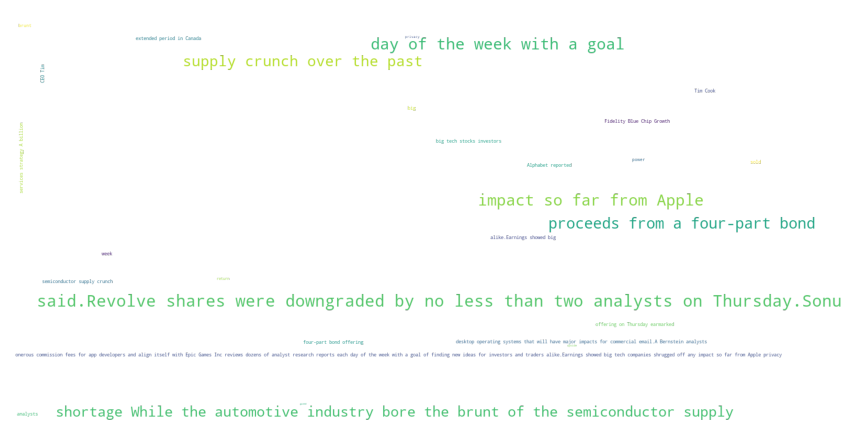

In [3]:
keys('AAPL')

In [4]:
# import requests
# import pandas as pd

# fm_key = '8a1cf9d14d53126b05c8a7636fe3d006'

# tickers = requests.get(f'https://financialmodelingprep.com/api/v3/sp500_constituent?apikey={fm_key}').json()
# tickers = pd.DataFrame(tickers)
# tickers = tickers.loc[:,'symbol'].to_list()
# # tickers

# for ticker in tickers[0:20]:
#     print(ticker)
#     keys(ticker)